# Machine Failure Project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [5]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### Separate X and Y

In [6]:
X = df.drop(columns=['Product ID','Machine failure'])
Y = df[['Machine failure']]

In [7]:
X.head()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [8]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [9]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

### Seperate Cat and Con features for X

In [10]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [11]:
cat

['Type']

In [12]:
con

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

### Create a preprocessing pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [14]:
# num pipe
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

# cat pipe
cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ordinal',OrdinalEncoder())])

# fit cat and con
pre1 = ColumnTransformer([('num',num_pipe1,con),
                         ('cat',cat_pipe1, cat)])

In [15]:
X_pre = pre1.fit_transform(X)
X_pre

array([[-1.73203811,  0.3958803 , -0.24623038, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.73201272,  1.46985559,  1.55860483, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-1.73198733, -0.30220363, -1.04035788, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 1.73198733,  0.34218154,  1.34202461, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.73201272,  0.98656671,  0.69228393, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.73203811, -1.59097397, -1.32913151, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [16]:
cols = pre1.get_feature_names_out()
cols

array(['num__id', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__Rotational speed [rpm]',
       'num__Torque [Nm]', 'num__Tool wear [min]', 'num__TWF', 'num__HDF',
       'num__PWF', 'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [17]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,-1.732038,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,-1.732013,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-1.731987,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,-1.731962,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.731937,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,1.731937,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,1.731962,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,1.731987,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,1.732013,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


### feature selection with mutual info scores

In [18]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.0001519 , 0.00553365, 0.00233323, 0.01895815, 0.0197554 ,
       0.00695948, 0.00754415, 0.02433874, 0.01140133, 0.01942679,
       0.00090653, 0.01141501])

In [19]:
mi = pd.Series(mi)
mi.index = X_pre.columns 
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024339
num__Torque [Nm]                0.019755
num__OSF                        0.019427
num__Rotational speed [rpm]     0.018958
cat__Type                       0.011415
num__PWF                        0.011401
num__TWF                        0.007544
num__Tool wear [min]            0.006959
num__Air temperature [K]        0.005534
num__Process temperature [K]    0.002333
num__RNF                        0.000907
num__id                         0.000152
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

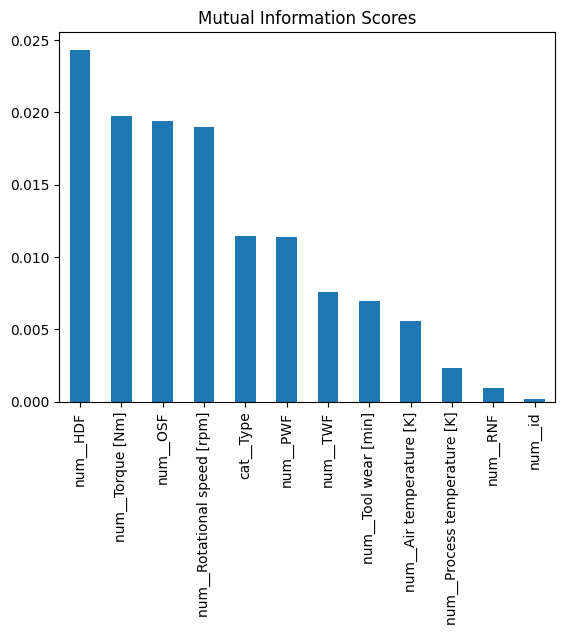

In [20]:
mi.plot(kind='bar', title='Mutual Information Scores')

In [21]:
sel_cols = list(mi.index)
sel_cols

['num__HDF',
 'num__Torque [Nm]',
 'num__OSF',
 'num__Rotational speed [rpm]',
 'cat__Type',
 'num__PWF',
 'num__TWF',
 'num__Tool wear [min]',
 'num__Air temperature [K]',
 'num__Process temperature [K]',
 'num__RNF',
 'num__id']

In [22]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif,k=12)
sel_features = sel.fit_transform(X_pre, Y)
sel_cols = sel.get_feature_names_out()

In [23]:
sel_cols

array(['num__id', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__Rotational speed [rpm]',
       'num__Torque [Nm]', 'num__Tool wear [min]', 'num__TWF', 'num__HDF',
       'num__PWF', 'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [24]:
sel_cols[0].split('__')[1]

'id'

In [25]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [26]:
imp_cols

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF',
 'Type']

In [27]:
X_sel = X[imp_cols]
X_sel

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type
0,0,300.6,309.6,1596,36.1,140,0,0,0,0,0,L
1,1,302.6,312.1,1759,29.1,200,0,0,0,0,0,M
2,2,299.3,308.5,1805,26.5,25,0,0,0,0,0,L
3,3,301.0,310.9,1524,44.3,197,0,0,0,0,0,L
4,4,298.0,309.0,1641,35.4,34,0,0,0,0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,M
136425,136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,H
136426,136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,L
136427,136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,L


### Create a final pipeline
cat  - onehotencoder

In [28]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [29]:
cat_sel

['Type']

In [30]:
con_sel

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
num_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [33]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

array([[-1.73203811,  0.3958803 , -0.24623038, ...,  0.        ,
         1.        ,  0.        ],
       [-1.73201272,  1.46985559,  1.55860483, ...,  0.        ,
         0.        ,  1.        ],
       [-1.73198733, -0.30220363, -1.04035788, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.73198733,  0.34218154,  1.34202461, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.73201272,  0.98656671,  0.69228393, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.73203811, -1.59097397, -1.32913151, ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__id', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__Rotational speed [rpm]',
       'num__Torque [Nm]', 'num__Tool wear [min]', 'num__TWF', 'num__HDF',
       'num__PWF', 'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [35]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,-1.732038,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,-1.732013,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-1.731987,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,-1.731962,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.731937,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,1.731937,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
136425,1.731962,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
136426,1.731987,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
136427,1.732013,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


### Train test split

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [37]:
xtrain.shape

(109143, 14)

In [38]:
xtest.shape

(27286, 14)

### Algo Evaluation

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [40]:
dct = {'Logistic': LogisticRegression(),
       'Decision Tree': DecisionTreeClassifier(),
       'Random Forest': RandomForestClassifier(),
       'Gradient Boost': GradientBoostingClassifier()}

In [41]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [42]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    model.fit(xtrain,ytrain)
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    f1_tr = f1_score(ytrain,ypred_tr)
    tr.append(f1_tr)
    scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)
    f1_ts = f1_score(ytest, ypred_ts)
    ts.append(f1_ts)
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr:.4f}')
    print(f'Training F1 CV : {f1_cv:.4f}')
    print(f'Testing F1 : {f1_ts:.4f}')
    print('\n=================================================\n')

Model Name : Logistic

Training F1 : 0.8625
Training F1 CV : 0.8622
Testing F1 : 0.8649


Model Name : Decision Tree

Training F1 : 1.0000
Training F1 CV : 0.7476
Testing F1 : 0.7601


Model Name : Random Forest

Training F1 : 0.9997
Training F1 CV : 0.8593
Testing F1 : 0.8612


Model Name : Gradient Boost

Training F1 : 0.8740
Training F1 CV : 0.8556
Testing F1 : 0.8645




### Create a df to show results

In [43]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost'])

In [44]:
eval_dct = {'Model_name': list(dct.keys()),
            'Train F1': tr,
            'Test F1': ts,
            'Train F1 CV': tr_cv}

In [45]:
eval_df = pd.DataFrame(eval_dct)
eval_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.862525,0.864865,0.862230
1,Decision Tree,1.000000,0.760090,0.747562
2,Random Forest,0.999708,0.861183,0.859281
3,Gradient Boost,0.874021,0.864450,0.855629


In [46]:
eval_df.sort_values(by='Test F1', ascending=False)

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.862525,0.864865,0.862230
3,Gradient Boost,0.874021,0.864450,0.855629
2,Random Forest,0.999708,0.861183,0.859281
1,Decision Tree,1.000000,0.760090,0.747562


In [47]:
params = {'C':[0.01, 0.1, 1, 10, 50, 100, 1000]}

In [48]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 1000]},
                   scoring='f1')

In [49]:
rscv.best_params_

{'C': 0.1}

In [50]:
rscv.best_score_

0.862513786746223

In [51]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.1)

### Evaluate accuracy in train and test

In [52]:
best_lr.score(xtrain, ytrain)

0.9961976489559569

In [53]:
best_lr.score(xtest, ytest)

0.9961518727552591

### Predict results in train and test

In [54]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [55]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [56]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [57]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [58]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### Create a confusion matrix for test

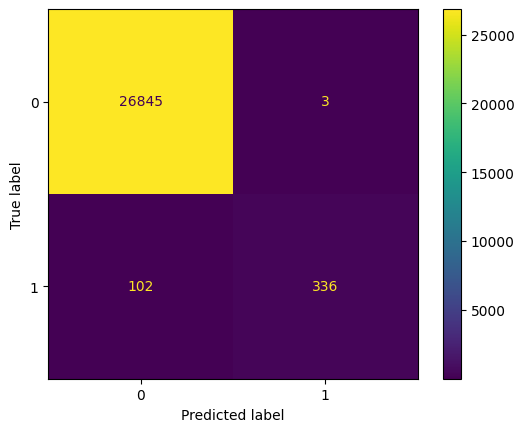

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

### Check classification report

In [60]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



### plotting ROC - AUC curve in train and test

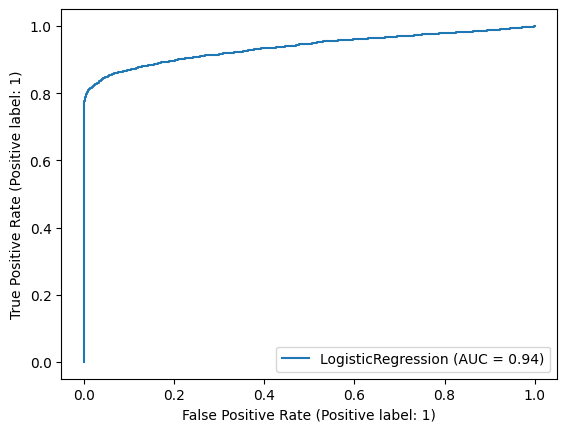

In [61]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr,xtrain,ytrain)

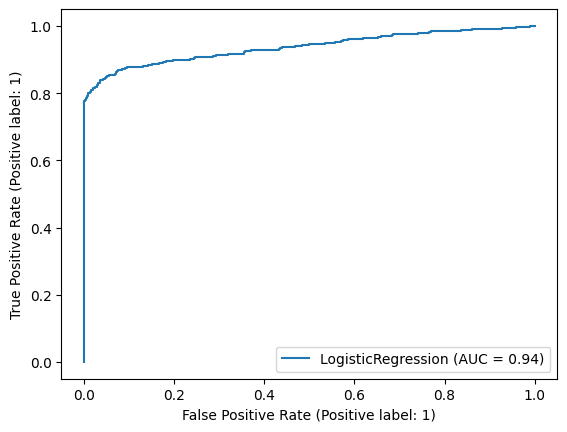

In [62]:
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

### Predicting test_titanic.csv

In [63]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [64]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### To preprocess out of sample data use pre.tranform()

In [66]:
xnew_pre = pre2.transform(xnew)
xnew_pre

array([[ 1.7320635 ,  1.30875929,  1.12544438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.73208889,  0.98656671,  0.76447734, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.73211429,  0.77177165,  0.33131689, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 4.04142226, -2.2890579 , -2.70080627, ...,  0.        ,
         1.        ,  0.        ],
       [ 4.04144765, -0.9465888 , -1.54571174, ...,  0.        ,
         1.        ,  0.        ],
       [ 4.04147304,  1.95314446,  2.06395869, ...,  0.        ,
         1.        ,  0.        ]])

In [67]:
xnew_pre = pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre.head()

,num__id,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.732064,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.732089,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,1.732114,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,1.732140,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.732165,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [68]:
preds = best_lr.predict(xnew_pre)

In [69]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Probability

In [70]:
prob = best_lr.predict_proba(xnew_pre)[:,1]
prob

array([0.00245492, 0.00121103, 0.00298903, ..., 0.00385477, 0.0030284 ,
       0.00303898])

### save this predictions in dataframe

In [71]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [72]:
df_final['Machine Failure'] = preds

In [73]:
df_final['Probability'] = prob

In [74]:
df_final

,id,Machine Failure,Probability
0,136429,0,0.002455
1,136430,0,0.001211
2,136431,0,0.002989
3,136432,0,0.003403
4,136433,0,0.004261
...,...,...,...
90949,227378,0,0.002941
90950,227379,0,0.000647
90951,227380,0,0.003855
90952,227381,0,0.003028


In [75]:
df_final.to_csv('Machine_failure_result')

In [76]:
df_final['Machine Failure'].value_counts()

Machine Failure
0    89849
1     1105
Name: count, dtype: int64

<Axes: xlabel='Machine Failure'>

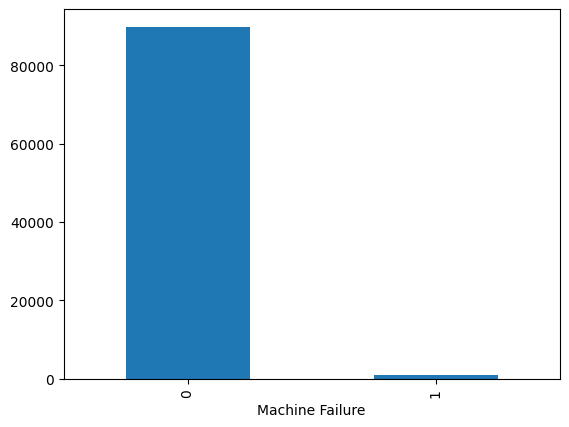

In [77]:
df_final['Machine Failure'].value_counts().plot(kind='bar')